<a href="https://colab.research.google.com/github/Susmita-Priya/twitter_depression/blob/main/Twitter_dataset1(without_preprocessing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Depression Detection Using Twitter Dataset

In [ ]:
#IMPORTING NECESSARY LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
twitter_df = pd.read_csv('/content/drive/MyDrive/Dataset/sentiment_tweets3.csv', encoding =('ISO-8859-1'),low_memory =False)
twitter_df

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [ ]:
# RENAMING COLUMNS

twitter_df = twitter_df.rename(columns = {"message to examine":"Text", "label (depression result)" :"Category" })

In [ ]:
# REVIEW DATA AFTER CHANGES

twitter_df.head(5)

,Index,Text,Category
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [ ]:
# KEEPING ONLY THE 2 NECESSARY COLUMNS

twitter_df = twitter_df[["Text", "Category"]]

In [ ]:
# REVIEW DATA AFTER CHANGES

twitter_df.head(5)

,Text,Category
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [ ]:
## Let's see some of the text

twitter_df.loc[10311]['Text']

'Ketamine Nasal Spray Shows Promise Against Depression, Suicide #health https://cmun.it/4sjligkÃ\x82Â\xa0'

In [ ]:
# CHECK THE SHAPE OF THE DATA

twitter_df.shape

(10314, 2)

In [ ]:
# CHECK INFO REGARDING IT

twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10314 non-null  object
 1   Category  10314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.3+ KB


In [ ]:
twitter_df["Category"].value_counts()

0    8000
1    2314
Name: Category, dtype: int64

Text(0.5, 1.0, 'COUNTS OF CATEGORIES OF BEING DEPRESSED OR NOT')

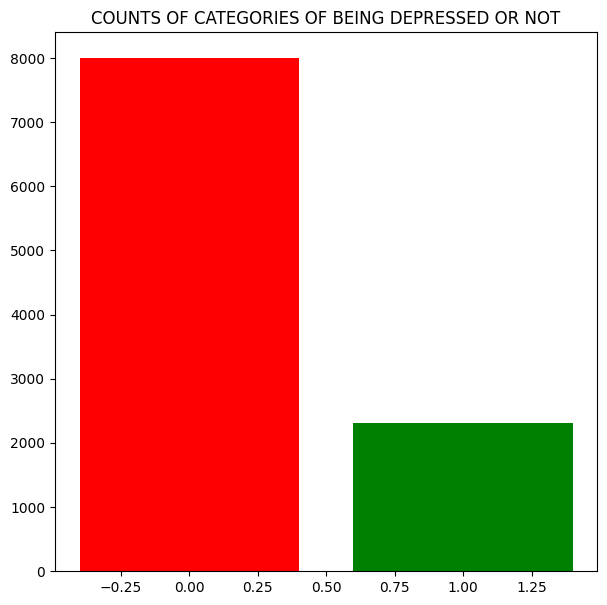

In [ ]:
# CHECKING COUNTS OF CATEGORIES

fig = plt.figure(figsize =(7, 7))
plt.bar(twitter_df["Category"].unique(), twitter_df["Category"].value_counts(),
         color =['red', 'green'])
plt.title("COUNTS OF CATEGORIES OF BEING DEPRESSED OR NOT")

In [ ]:
# install wordcloud

!pip install wordcloud

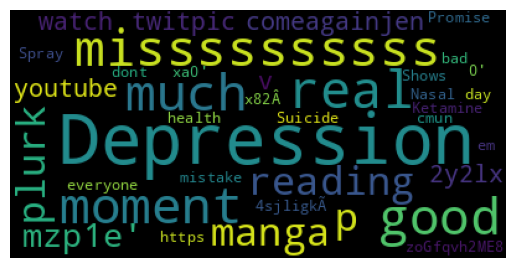

<Figure size 4000x4000 with 0 Axes>

<Figure size 4000x4000 with 0 Axes>

In [ ]:
# CREATING WORDCLOUD TO CHECK MOST OCCURING WORDS IN PREPROCESSED DATA

from wordcloud import WordCloud, STOPWORDS
text = twitter_df['Text'].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.figure(figsize = (40,40), facecolor = None)

In [ ]:
# Assuming 'text' is the feature and 'label' is the target variable
X = twitter_df['Text']
y = twitter_df['Category']

# TEXT VECTORIZATION

In [ ]:
# IMPORTING LIBRARY TO IMPLEMENT TF-IDF ALGORITHM
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# FITTING OUR MACHINE LEARNING MODELS

1) LOGISTIC REGRESSION MODEL

In [ ]:
# IMPORTING LIBRARY TO IMPLEMENT LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

In [ ]:
# Create a machine learning model (Logistic Regression in this example)
model = LogisticRegression( random_state=42)

# Train the model on the TF-IDF transformed training set
model.fit(X_train, y_train)

# Make predictions on the TF-IDF transformed test set
y_pred_lr = model.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy_lr}")

Accuracy: 0.9806107610276297


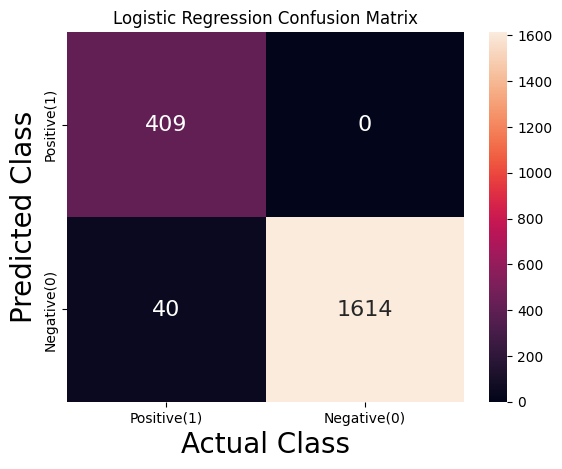

In [ ]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

# Plot confusion matrix
cm = confusion_matrix(y_pred_lr, y_test, labels = [1,0])
sns.heatmap(cm, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

2) DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred_dt = model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt}')


Decision Tree Accuracy: 0.9655841008240427


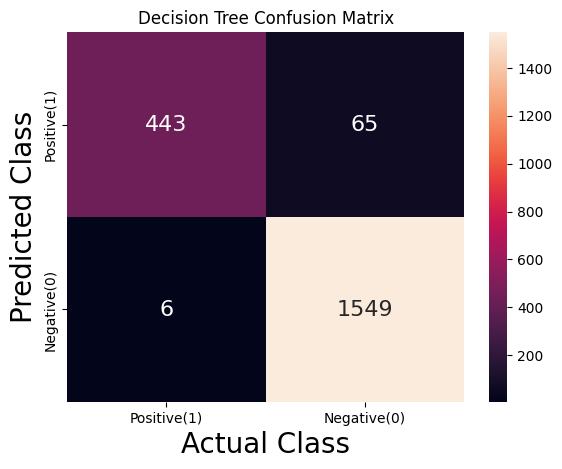

In [ ]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

# Confusion matrix
cm = confusion_matrix(y_pred_dt, y_test, labels = [1,0])
sns.heatmap(cm, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

3) RANDOM FORESTS CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')


Random Forest Accuracy: 0.9728550654386815


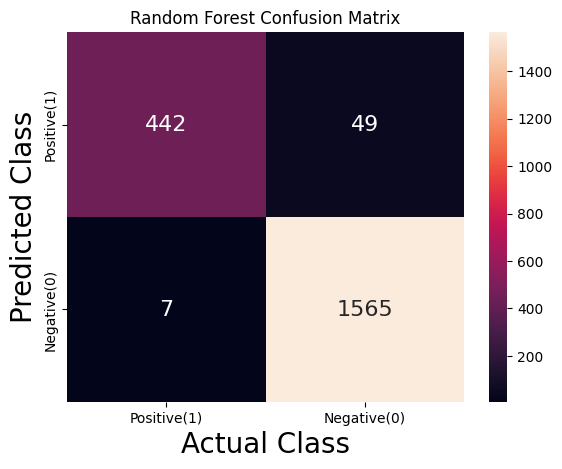

In [ ]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

# Confusion matrix
cm = confusion_matrix(y_pred_rf, y_test, labels = [1,0])
sns.heatmap(cm, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

4) Gradient Boosting Model:

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred_gb = model.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Accuracy: {accuracy_gb}')

Accuracy: 0.9961221522055259


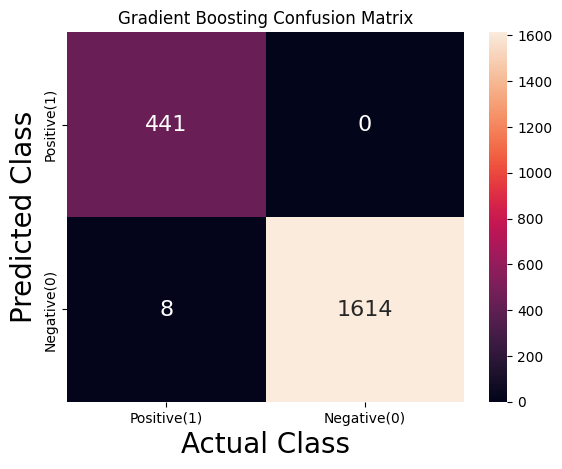

In [ ]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

# Confusion matrix
cm = confusion_matrix(y_pred_gb, y_test, labels = [1,0])
sns.heatmap(cm, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

5) Naive Bayes Models

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred_nb = model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes Accuracy: {accuracy_nb}')


Naive Bayes Accuracy: 0.8860882210373243


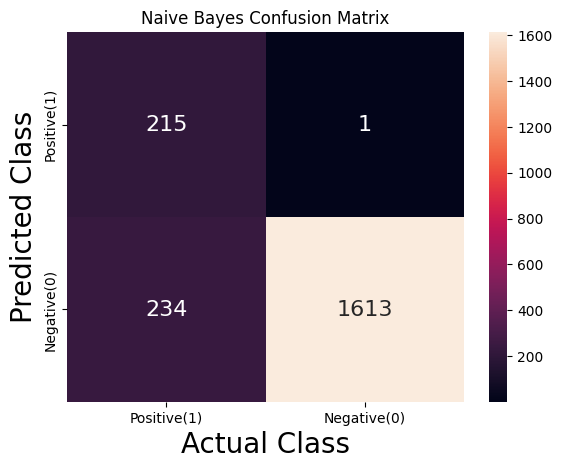

In [ ]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

# Confusion matrix
cm = confusion_matrix(y_pred_nb, y_test, labels = [1,0])
sns.heatmap(cm, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(sequences)

6) LSTM model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# LSTM
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=X_padded.shape[1]))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Assuming binary classification, adjust accordingly
y_binary = (y > 0).astype(int)

# Split the dataset
X_trainn, X_testt, y_trainn, y_testt = train_test_split(X_padded, y_binary, test_size=0.2, random_state=42)

model.fit(X_trainn, y_trainn, epochs=5, batch_size=64)

# Evaluate the model
y_pred = model.predict(X_testt)
y_pred_lstm = (y_pred > 0.5).astype(int)
accuracy_lstm = accuracy_score(y_testt, y_pred_lstm)
print(f'LSTM Accuracy: {accuracy_lstm}')


Epoch 1/5
129/129 [==============================] - 23s 159ms/step - loss: 0.2589 - accuracy: 0.8967
Epoch 2/5
129/129 [==============================] - 23s 177ms/step - loss: 0.0123 - accuracy: 0.9983
Epoch 3/5
129/129 [==============================] - 20s 157ms/step - loss: 0.0063 - accuracy: 0.9989
Epoch 4/5
129/129 [==============================] - 22s 170ms/step - loss: 0.0024 - accuracy: 0.9996
Epoch 5/5
65/65 [==============================] - 2s 24ms/step
LSTM Accuracy: 0.9946679592825982


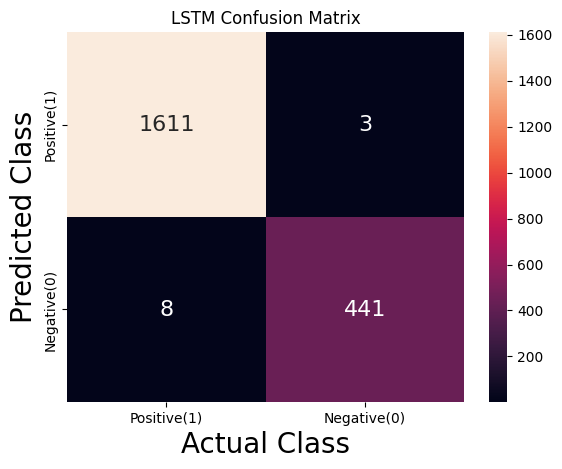

In [ ]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

# Confusion matrix
cm = confusion_matrix(y_testt, y_pred_lstm)
sns.heatmap(cm, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.title("LSTM Confusion Matrix")
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

7) CNN model

In [ ]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense

# CNN
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=X_padded.shape[1]))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_trainn, y_trainn, epochs=5, batch_size=64)

# Evaluate the model
y_pred = model.predict(X_testt)
y_pred_cnn = (y_pred > 0.5).astype(int)
accuracy_cnn = accuracy_score(y_testt, y_pred_cnn)
print(f'CNN Accuracy: {accuracy_cnn}')


Epoch 1/5
129/129 [==============================] - 7s 46ms/step - loss: 0.2626 - accuracy: 0.8988
Epoch 2/5
129/129 [==============================] - 8s 61ms/step - loss: 0.0146 - accuracy: 0.9967
Epoch 3/5
129/129 [==============================] - 6s 44ms/step - loss: 0.0073 - accuracy: 0.9979
Epoch 4/5
129/129 [==============================] - 7s 54ms/step - loss: 0.0034 - accuracy: 0.9993
Epoch 5/5
65/65 [==============================] - 0s 5ms/step
CNN Accuracy: 0.9956374212312167


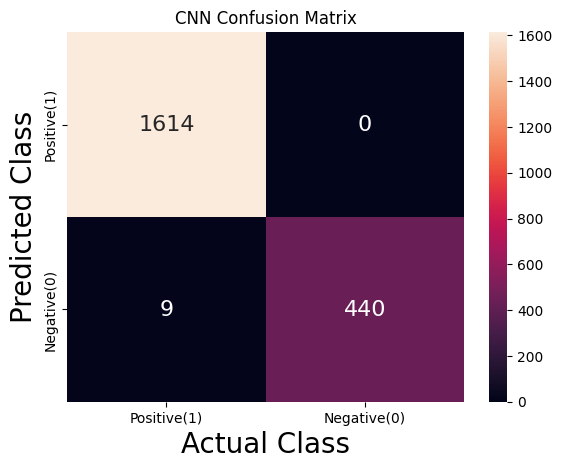

In [ ]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_cnn)
sns.heatmap(cm, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.title("CNN Confusion Matrix")
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

8) RNN model

In [ ]:
from tensorflow.keras.layers import SimpleRNN

# RNN
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=X_padded.shape[1]))
model.add(SimpleRNN(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_trainn, y_trainn, epochs=5, batch_size=64)

# Evaluate the model
y_pred = model.predict(X_testt)
y_pred_rnn = (y_pred > 0.5).astype(int)
accuracy_rnn = accuracy_score(y_testt, y_pred_rnn)
print(f'RNN Accuracy: {accuracy_rnn}')




Epoch 1/5
129/129 [==============================] - 10s 65ms/step - loss: 0.4599 - accuracy: 0.8039
Epoch 2/5
129/129 [==============================] - 6s 49ms/step - loss: 0.0888 - accuracy: 0.9759
Epoch 3/5
129/129 [==============================] - 8s 61ms/step - loss: 0.0152 - accuracy: 0.9979
Epoch 4/5
129/129 [==============================] - 7s 53ms/step - loss: 0.0065 - accuracy: 0.9993
Epoch 5/5
65/65 [==============================] - 1s 11ms/step
RNN Accuracy: 0.9956374212312167


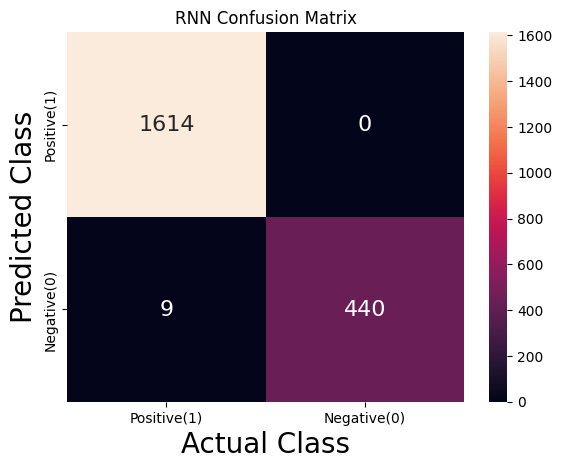

In [ ]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rnn)
sns.heatmap(cm, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.title("RNN Confusion Matrix")
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

EVALUATING OUR MODELS

In [ ]:
# IMPORTING LIBRARIES TO EVALAUTE MODELS

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

In [ ]:
# CHECKING THE ACCURACY SCORES OF MODELS

print("THE ACCURACY SCORES OF OUR MODELS ARE AS FOLLOWS:", "\n")
print("Accuracy Score of our Logistic Regression Classifier is: ", accuracy_lr, "\n")
print("Accuracy Score of our Decision Tree Classifier is: ", accuracy_dt, "\n")
print("Accuracy Score of our Random Forest Classifier is: ", accuracy_rf, "\n")
print("Accuracy Score of our Gradient bosting Classifier is: ", accuracy_gb, "\n")
print("Accuracy Score of our Naive Baias Classifier is: ", accuracy_nb, "\n")
print("Accuracy Score of our LSTM Classifier is: ", accuracy_lstm, "\n")
print("Accuracy Score of our CNN Classifier is: ", accuracy_cnn, "\n")
print("Accuracy Score of our RNN Classifier is: ", accuracy_rnn, "\n")

THE ACCURACY SCORES OF OUR MODELS ARE AS FOLLOWS: 

Accuracy Score of our Logistic Regression Classifier is:  0.9806107610276297 

Accuracy Score of our Decision Tree Classifier is:  0.9655841008240427 

Accuracy Score of our Random Forest Classifier is:  0.9728550654386815 

Accuracy Score of our Gradient bosting Classifier is:  0.9961221522055259 

Accuracy Score of our Naive Baias Classifier is:  0.8860882210373243 

Accuracy Score of our LSTM Classifier is:  0.9946679592825982 

Accuracy Score of our CNN Classifier is:  0.9956374212312167 

Accuracy Score of our RNN Classifier is:  0.9956374212312167 



<Figure size 10000x10000 with 0 Axes>

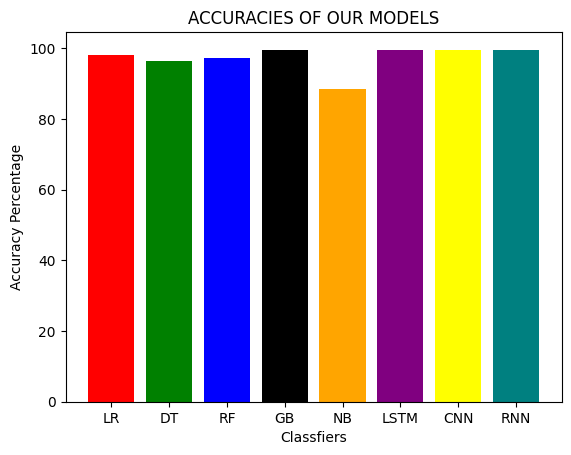

<Figure size 10000x10000 with 0 Axes>

In [ ]:
# COMPARING THE ACCURACIES OF MODELS USING A BAR PLOT

plt.bar(x = ["LR","DT", "RF", "GB","NB", "LSTM","CNN","RNN"], height = [(accuracy_lr)*100, (accuracy_dt)*100,(accuracy_rf)*100,(accuracy_gb)*100,(accuracy_nb)*100,(accuracy_lstm)*100,(accuracy_cnn)*100,(accuracy_rnn)*100], color = ["red", "green", "blue", "Black", "orange","purple","yellow","Teal"])
plt.title("ACCURACIES OF OUR MODELS")
plt.ylabel("Accuracy Percentage")
plt.xlabel("Classfiers")
plt.figure(figsize=(100,100))

In [ ]:
# CHECKING Binary Cross-Entropy Loss OF MODELS

print("THE Binary Cross-Entropy Loss OF OUR MODELS:", "\n")
print("Loss of our Logistic Regression model is: ", log_loss(y_pred_lr, y_test), "\n")
print("Loss of our Decision Tree Classifier is: ", log_loss(y_pred_dt, y_test), "\n")
print("Loss of our Random Forest Classifier is: ", log_loss(y_pred_rf, y_test), "\n")
print("Loss of our gradient boost Classifier is: ", log_loss(y_pred_gb, y_test), "\n")
print("Loss of our NaiveBayes Classifier is: ", log_loss(y_pred_nb, y_test), "\n")
print("Loss of our LSTM Classifier is: ",log_loss(y_pred_lstm,y_test), "\n")
print("Loss of our CNN Classifier is: ", log_loss(y_pred_cnn, y_test), "\n")
print("Loss of our RNN Classifier is: ", log_loss(y_pred_rnn, y_test), "\n")

THE Binary Cross-Entropy Loss OF OUR MODELS: 

Loss of our Logistic Regression model is:  0.6988590089988785 

Loss of our Decision Tree Classifier is:  1.2404747409730095 

Loss of our Random Forest Classifier is:  0.9784026125984301 

Loss of our gradient boost Classifier is:  0.1397718017997759 

Loss of our NaiveBayes Classifier is:  4.10579667786841 

Loss of our LSTM Classifier is:  0.1921862274746918 

Loss of our CNN Classifier is:  0.15724327702474786 

Loss of our RNN Classifier is:  0.15724327702474786 



In [ ]:
# CHECKING THE F1 SCORES OF MODELS

print("THE F1 SCORES OF OUR MODELS:", "\n")
print("F1 Score of our Logistic Regression model is: ", f1_score(y_pred_lr, y_test), "\n")
print("F1 Score of our Decision Tree Classifier is: ", f1_score(y_pred_dt, y_test), "\n")
print("F1 Score of our Random Forest Classifier is: ", f1_score(y_pred_rf, y_test), "\n")
print("F1 Score of our gradient boost Classifier is: ", f1_score(y_pred_gb, y_test), "\n")
print("F1 Score of our NaiveBayes Classifier is: ", f1_score(y_pred_nb, y_test), "\n")
print("F1 Score of our LSTM Classifier is: ", f1_score(y_pred_lstm,y_test), "\n")
print("F1 Score of our CNN Classifier is: ", f1_score(y_pred_cnn, y_test), "\n")
print("F1 Score of our RNN Classifier is: ", f1_score(y_pred_rnn, y_test), "\n")

THE F1 SCORES OF OUR MODELS: 

F1 Score of our Logistic Regression model is:  0.9533799533799534 

F1 Score of our Decision Tree Classifier is:  0.9258098223615465 

F1 Score of our Random Forest Classifier is:  0.9404255319148936 

F1 Score of our gradient boost Classifier is:  0.9910112359550562 

F1 Score of our NaiveBayes Classifier is:  0.6466165413533834 

F1 Score of our LSTM Classifier is:  0.9876819708846584 

F1 Score of our CNN Classifier is:  0.9898762654668167 

F1 Score of our RNN Classifier is:  0.9898762654668167 



In [ ]:
# CHECKING THE RECALL SCORE

print("THE RECALL SCORES OF OUR MODELS", "\n")
print("Recall Score of our Logistic Regression model is: ", recall_score(y_pred_lr, y_test), "\n")
print("Recall Score of our Decision Tree Classifier is: ", recall_score(y_pred_dt, y_test), "\n")
print("Recall Score of our Random Forest Classifier is: ", recall_score(y_pred_rf, y_test), "\n")
print("Recall Score of our gradient boost Classifier is: ", recall_score(y_pred_gb, y_test), "\n")
print("Recall Score of our NaiveBayes Classifier is: ", recall_score(y_pred_nb, y_test), "\n")
print("Recall Score of our LSTM Classifier is: ", recall_score(y_pred_lstm,y_test), "\n")
print("Recall Score of our CNN Classifier is: ", recall_score(y_pred_cnn, y_test), "\n")
print("Recall Score of our RNN Classifier is: ", recall_score(y_pred_rnn, y_test), "\n")

THE RECALL SCORES OF OUR MODELS 

Recall Score of our Logistic Regression model is:  1.0 

Recall Score of our Decision Tree Classifier is:  0.8720472440944882 

Recall Score of our Random Forest Classifier is:  0.90020366598778 

Recall Score of our gradient boost Classifier is:  1.0 

Recall Score of our NaiveBayes Classifier is:  0.9953703703703703 

Recall Score of our LSTM Classifier is:  0.9932432432432432 

Recall Score of our CNN Classifier is:  1.0 

Recall Score of our RNN Classifier is:  1.0 



In [ ]:
# CHECKING THE PRECISION score
from sklearn.metrics import precision_score

print("THE PRECISION SCORES OF OUR MODELS", "\n")
print("PRECISION Score of our Logistic Regression model is: ", precision_score(y_pred_lr, y_test), "\n")
print("PRECISION Score of our Decision Tree Classifier is: ", precision_score(y_pred_dt, y_test), "\n")
print("PRECISION Score of our Random Forest Classifier is: ", precision_score(y_pred_rf, y_test), "\n")
print("PRECISION Score of our gradient boost Classifier is: ", precision_score(y_pred_gb, y_test), "\n")
print("PRECISION Score of our NaiveBayes Classifier is: ", precision_score(y_pred_nb, y_test), "\n")
print("PRECISION Score of our LSTM Classifier is: ", precision_score(y_test,y_pred_lstm) ,"\n")
print("PRECISION Score of our CNN Classifier is: ", precision_score(y_pred_cnn, y_test), "\n")
print("PRECISION Score of our RNN Classifier is: ", precision_score(y_pred_rnn, y_test), "\n")

THE PRECISION SCORES OF OUR MODELS 

PRECISION Score of our Logistic Regression model is:  0.910913140311804 

PRECISION Score of our Decision Tree Classifier is:  0.9866369710467706 

PRECISION Score of our Random Forest Classifier is:  0.9844097995545658 

PRECISION Score of our gradient boost Classifier is:  0.9821826280623608 

PRECISION Score of our NaiveBayes Classifier is:  0.47884187082405344 

PRECISION Score of our LSTM Classifier is:  0.9932432432432432 

PRECISION Score of our CNN Classifier is:  0.9799554565701559 

PRECISION Score of our RNN Classifier is:  0.9799554565701559 



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mae_lr = mean_absolute_error(y_pred_lr, y_test)
mae_dt = mean_absolute_error(y_pred_dt, y_test)
mae_rf = mean_absolute_error(y_pred_rf, y_test)
mae_gb = mean_absolute_error(y_pred_gb, y_test)
mae_mnb = mean_absolute_error(y_pred_nb, y_test)
mae_lstm = mean_absolute_error(y_pred_lstm, y_test)
mae_cnn = mean_absolute_error(y_pred_cnn, y_test)
mae_rnn = mean_absolute_error(y_pred_rnn, y_test)

In [ ]:
print("MEAN ABSOLUTE ERROR OF OUR MODELS", "\n")
print("MEAN ABSOLUTE ERROR of our Logistic Regression model is: ", mae_lr, "\n")
print("MEAN ABSOLUTE ERROR of our Decision Tree Classifier is: ", mae_dt, "\n")
print("MEAN ABSOLUTE ERROR of our Random Forest Classifier is: ", mae_rf, "\n")
print("MEAN ABSOLUTE ERROR of our gradient boost Classifier is: ", mae_gb, "\n")
print("MEAN ABSOLUTE ERROR of our NaiveBayes Classifier is: ", mae_mnb, "\n")
print("MEAN ABSOLUTE ERROR Score of our LSTM Classifier is: ", mae_lstm ,"\n")
print("MEAN ABSOLUTE ERROR of our CNN Classifier is: ", mae_cnn, "\n")
print("MEAN ABSOLUTE ERROR of our RNN Classifier is: ", mae_rnn, "\n")

MEAN ABSOLUTE ERROR OF OUR MODELS 

MEAN ABSOLUTE ERROR of our Logistic Regression model is:  0.019389238972370333 

MEAN ABSOLUTE ERROR of our Decision Tree Classifier is:  0.034415899175957346 

MEAN ABSOLUTE ERROR of our Random Forest Classifier is:  0.02714493456131847 

MEAN ABSOLUTE ERROR of our gradient boost Classifier is:  0.003877847794474067 

MEAN ABSOLUTE ERROR of our NaiveBayes Classifier is:  0.11391177896267571 

MEAN ABSOLUTE ERROR Score of our LSTM Classifier is:  0.005332040717401842 

MEAN ABSOLUTE ERROR of our CNN Classifier is:  0.004362578768783325 

MEAN ABSOLUTE ERROR of our RNN Classifier is:  0.004362578768783325 



In [ ]:
mse_lr = mean_squared_error(y_pred_lr, y_test)
mse_dt = mean_squared_error(y_pred_dt, y_test)
mse_rf = mean_squared_error(y_pred_rf, y_test)
mse_gb = mean_squared_error(y_pred_gb, y_test)
mse_mnb = mean_squared_error(y_pred_nb, y_test)
mse_lstm = mean_squared_error(y_pred_lstm, y_test)
mse_cnn = mean_squared_error(y_pred_cnn, y_test)
mse_rnn = mean_squared_error(y_pred_rnn, y_test)

In [ ]:
print("MEAN SQUARE ERROR OF OUR MODELS", "\n")
print("MEAN SQUARE ERROR of our Logistic Regression model is: ", mse_lr, "\n")
print("MEAN SQUARE ERROR of our Decision Tree Classifier is: ", mse_dt, "\n")
print("MEAN SQUARE ERROR of our Random Forest Classifier is: ", mse_rf, "\n")
print("MEAN SQUARE ERROR of our gradient boost Classifier is: ", mse_gb, "\n")
print("MEAN SQUARE ERROR of our NaiveBayes Classifier is: ", mse_mnb, "\n")
print("MEAN SQUARE ERROR Score of our LSTM Classifier is: ", mse_lstm ,"\n")
print("MEAN SQUARE ERROR of our CNN Classifier is: ", mse_cnn, "\n")
print("MEAN SQUARE ERROR of our RNN Classifier is: ", mse_rnn, "\n")

MEAN SQUARE ERROR OF OUR MODELS 

MEAN SQUARE ERROR of our Logistic Regression model is:  0.019389238972370333 

MEAN SQUARE ERROR of our Decision Tree Classifier is:  0.034415899175957346 

MEAN SQUARE ERROR of our Random Forest Classifier is:  0.02714493456131847 

MEAN SQUARE ERROR of our gradient boost Classifier is:  0.003877847794474067 

MEAN SQUARE ERROR of our NaiveBayes Classifier is:  0.11391177896267571 

MEAN SQUARE ERROR Score of our LSTM Classifier is:  0.005332040717401842 

MEAN SQUARE ERROR of our CNN Classifier is:  0.004362578768783325 

MEAN SQUARE ERROR of our RNN Classifier is:  0.004362578768783325 



In [ ]:
rmse_lr = np.sqrt(mse_lr)
rmse_dt = np.sqrt(mse_dt)
rmse_rf = np.sqrt(mse_rf)
rmse_gb = np.sqrt(mae_gb)
rmse_mnb = np.sqrt(mse_mnb)
rmse_lstm = np.sqrt(mse_lstm)
rmse_cnn = np.sqrt(mse_cnn)
rmse_rnn = np.sqrt(mse_rnn)

In [ ]:
print("ROOT MEAN SQUARE ERROR OF OUR MODELS", "\n")
print("ROOT MEAN SQUARE ERROR of our Logistic Regression model is: ", rmse_lr, "\n")
print("ROOT MEAN SQUARE ERROR of our Decision Tree Classifier is: ", rmse_dt, "\n")
print("ROOT MEAN SQUARE ERROR of our Random Forest Classifier is: ", rmse_rf, "\n")
print("ROOT MEAN SQUARE ERROR of our gradient boost Classifier is: ", rmse_gb, "\n")
print("ROOT MEAN SQUARE ERROR of our NaiveBayes Classifier is: ", rmse_mnb, "\n")
print("ROOT MEAN SQUARE ERROR Score of our LSTM Classifier is: ", rmse_lstm ,"\n")
print("ROOT MEAN SQUARE ERROR of our CNN Classifier is: ", rmse_cnn, "\n")
print("ROOT MEAN SQUARE ERROR of our RNN Classifier is: ", rmse_rnn, "\n")

ROOT MEAN SQUARE ERROR OF OUR MODELS 

ROOT MEAN SQUARE ERROR of our Logistic Regression model is:  0.1392452475755289 

ROOT MEAN SQUARE ERROR of our Decision Tree Classifier is:  0.1855152262644696 

ROOT MEAN SQUARE ERROR of our Random Forest Classifier is:  0.16475719881485745 

ROOT MEAN SQUARE ERROR of our gradient boost Classifier is:  0.062272367824534075 

ROOT MEAN SQUARE ERROR of our NaiveBayes Classifier is:  0.33750819095642065 

ROOT MEAN SQUARE ERROR Score of our LSTM Classifier is:  0.07302082386142902 

ROOT MEAN SQUARE ERROR of our CNN Classifier is:  0.06604982035390652 

ROOT MEAN SQUARE ERROR of our RNN Classifier is:  0.06604982035390652 

